In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [21]:
data =  pd.read_csv('data_employee_clean (2).csv')
data = data[data['Sales (Domestic Ultimate Total USD)'] > 0]
data = data[data['Sales (Global Ultimate Total USD)'] > 0]

In [22]:
#Convert entity to numbers
convert = []
for i in range(len(data)):
    entity = data.iloc[i]['Entity Type']
    if entity == 'Subsidiary':
        l = 1
    elif entity == 'Parent':
        l = 2
    elif entity == 'Branch':
        l = 3
    elif entity == 'Independent':
        l = 4
    convert.append(l)
data['entity type conversion'] = convert

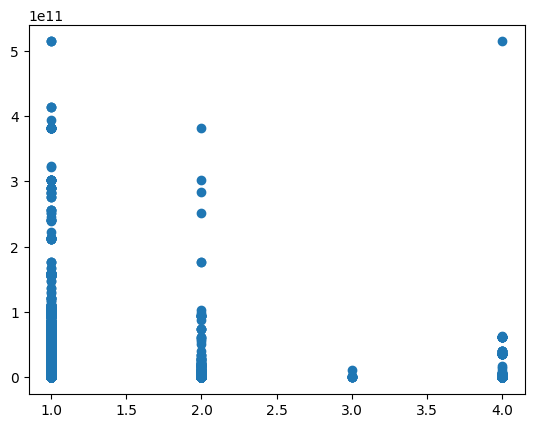

In [4]:
#Try with Global Ultimate Sales
plt.scatter(data['entity type conversion'], data['Sales (Global Ultimate Total USD)'])
plt.show()

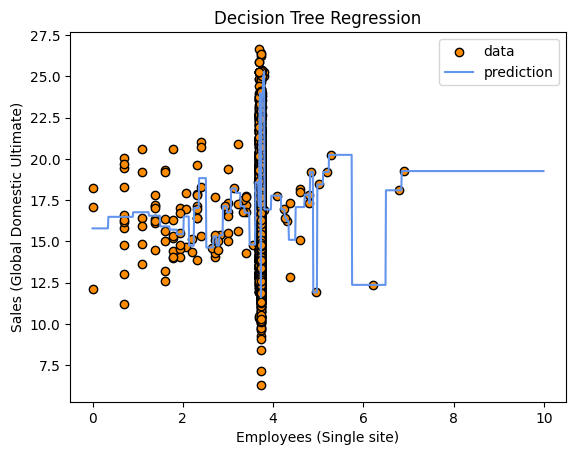

In [7]:
#(1) - TESTING WITH PARENTS + GLOBAL SALES
entity_type = ['Subsidiary','Parent', 'Branch', 'Independent' ]
Parent = data[data['Entity Type'] == 'Parent']

# Generate some example data
X = np.array(np.log(Parent['Employees (Single Site)'])).reshape(-1,1)
y = np.log(Parent['Sales (Global Ultimate Total USD)'])

# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter

# Fit the model to the data
regressor.fit(X, y)

# Make predictions
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("Employees (Single site)")
plt.ylabel("Sales (Global Domestic Ultimate)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [8]:
# Sample data for demonstration
X = np.array(np.log(Parent['Employees (Single Site)'])).reshape(-1,1)
y = np.log(Parent['Sales (Global Ultimate Total USD)'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 50)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.1596681703972087
Mean Absolute Error: 0.29712748426863334


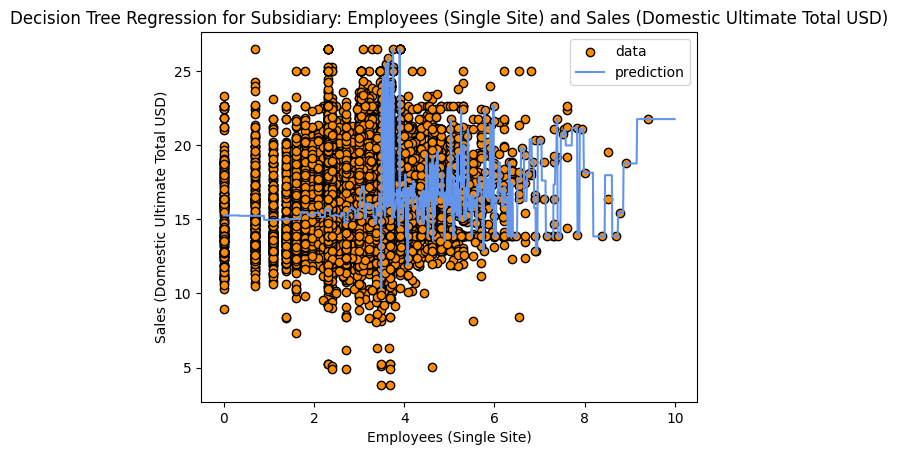

Errors for Subsidiary: Employees (Single Site) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 5.22221315906217
Mean Absolute Error: 1.624897282378822


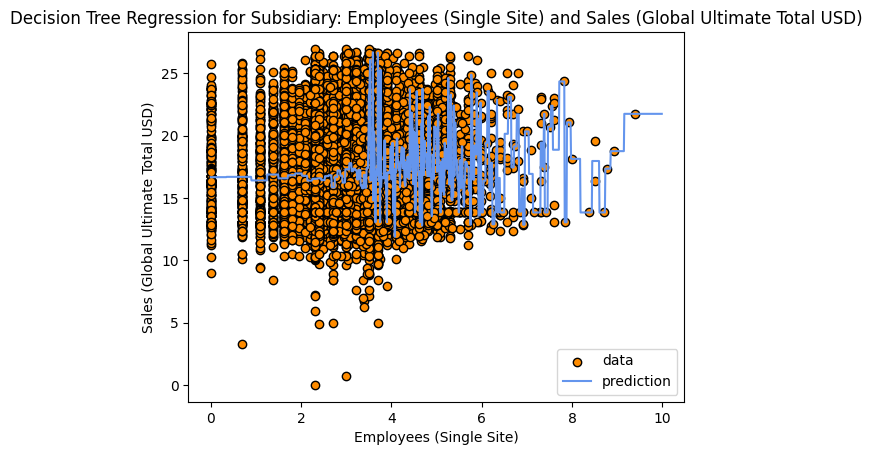

Errors for Subsidiary: Employees (Single Site) and Sales (Global Ultimate Total USD)
Mean Squared Error: 13.203648734986944
Mean Absolute Error: 2.9151220811366


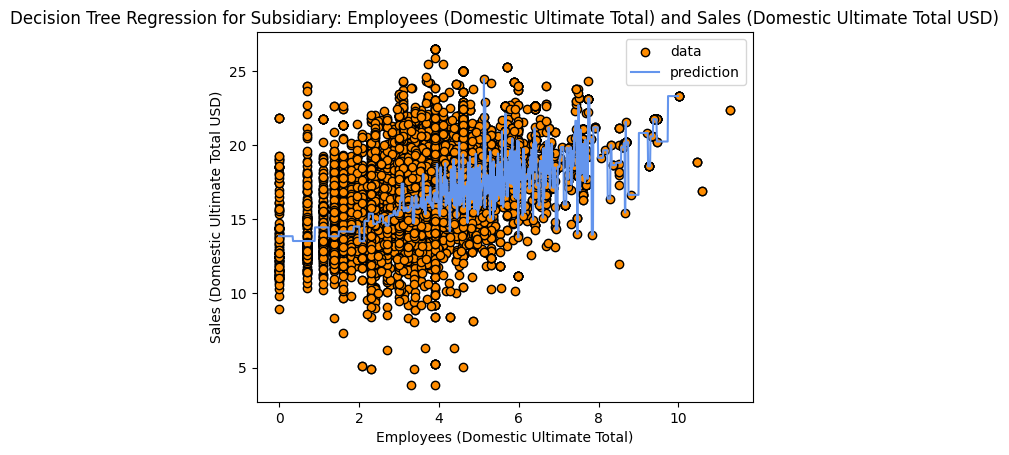

Errors for Subsidiary: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 3.275366634264289
Mean Absolute Error: 1.1721842356389427


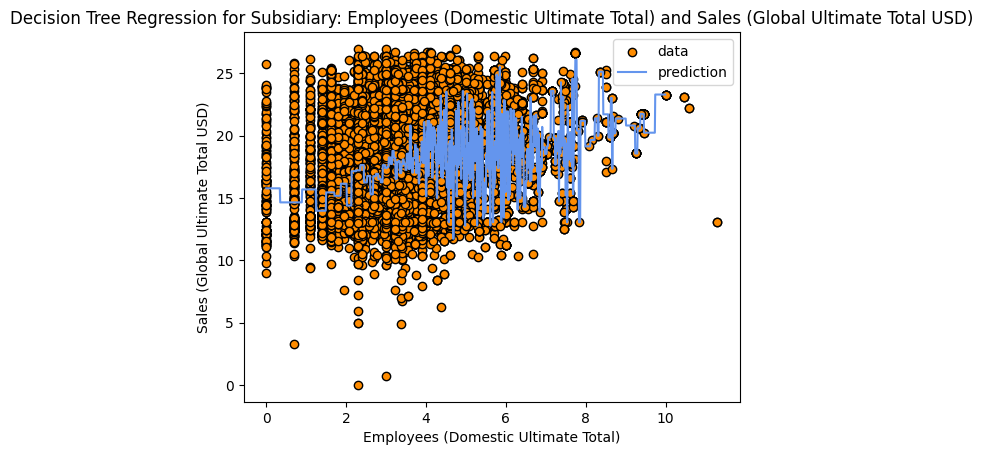

Errors for Subsidiary: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 9.731437924149414
Mean Absolute Error: 2.2648752980396427


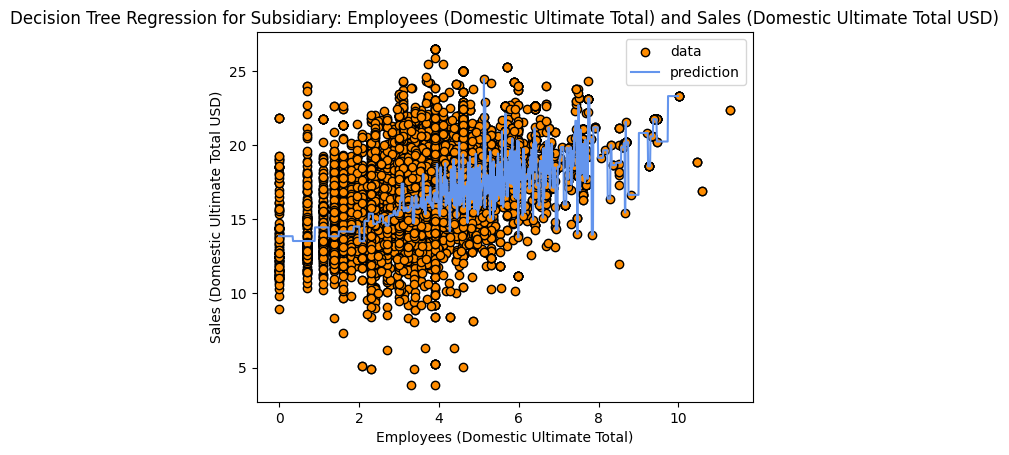

Errors for Subsidiary: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 3.275366634264289
Mean Absolute Error: 1.1721842356389427


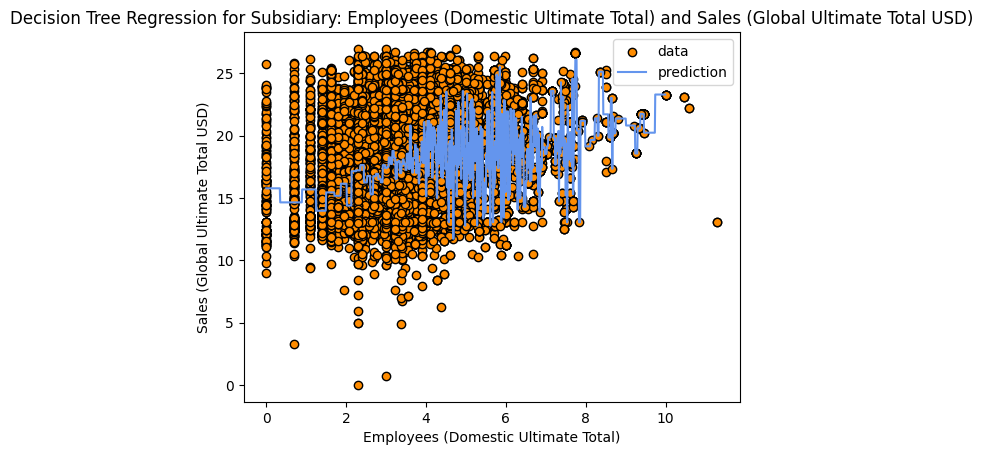

Errors for Subsidiary: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 9.731437924149414
Mean Absolute Error: 2.2648752980396427


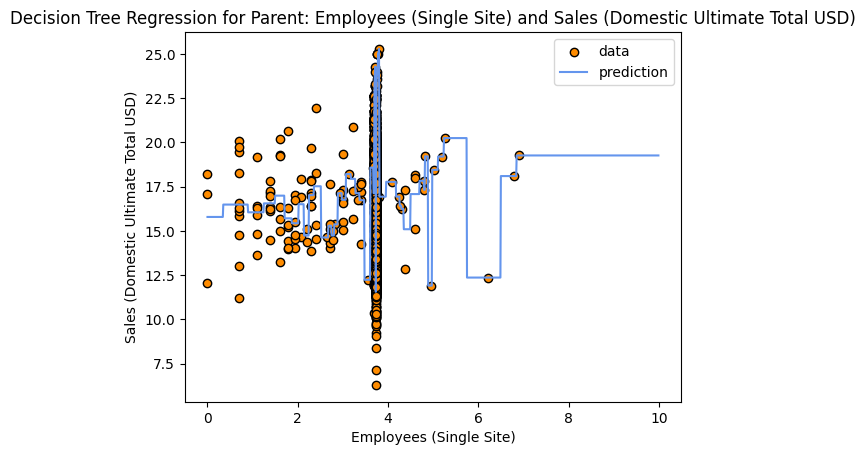

Errors for Parent: Employees (Single Site) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 0.12328366623482537
Mean Absolute Error: 0.08213658726350748


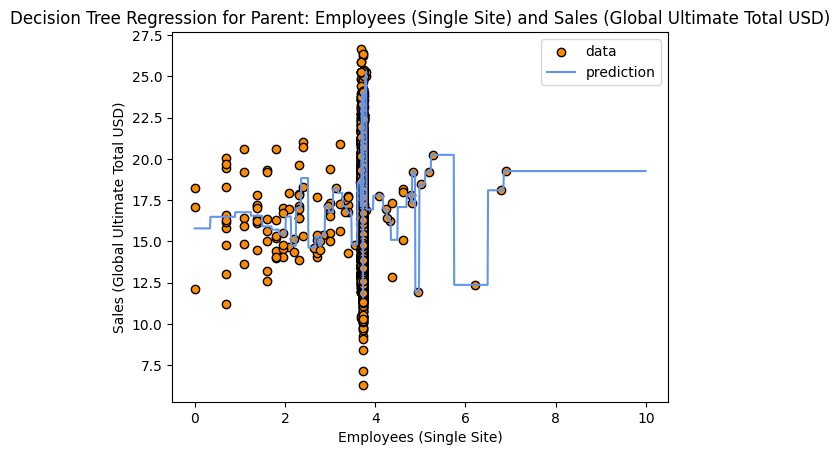

Errors for Parent: Employees (Single Site) and Sales (Global Ultimate Total USD)
Mean Squared Error: 1.1596681703972087
Mean Absolute Error: 0.29712748426863334


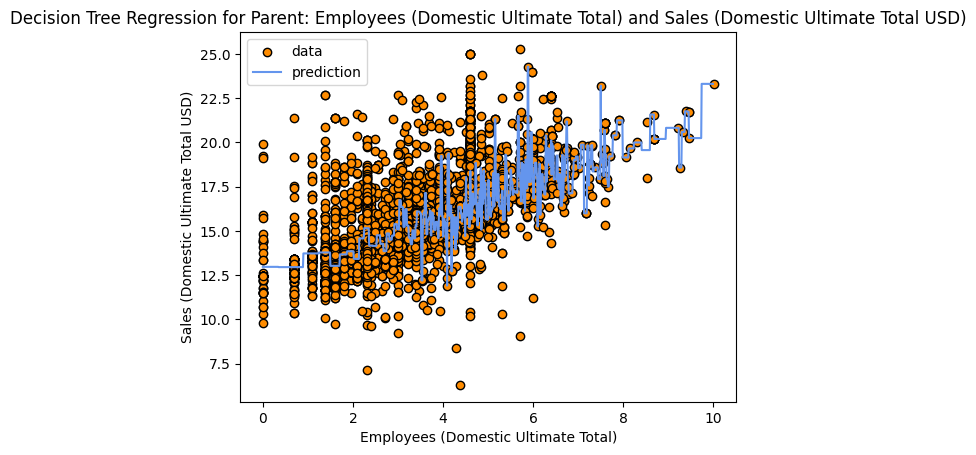

Errors for Parent: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 1.6408888481195554
Mean Absolute Error: 0.7362931308418492


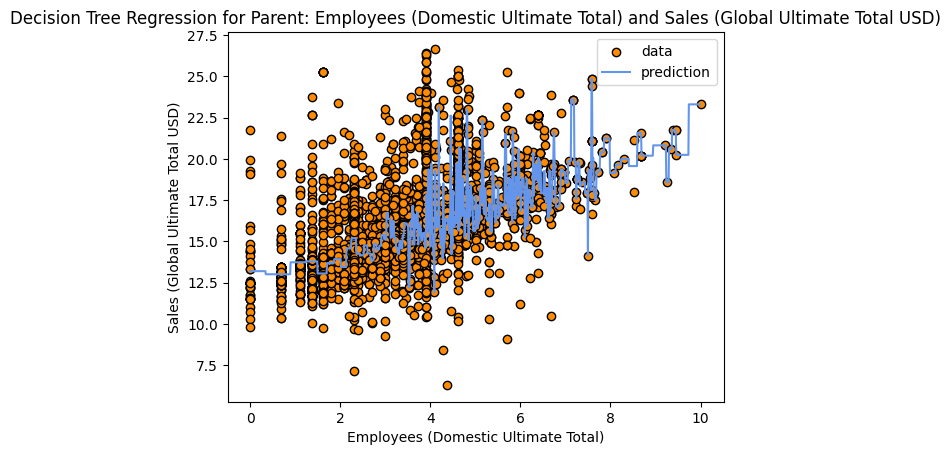

Errors for Parent: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 2.39920504310509
Mean Absolute Error: 0.8684209289986162


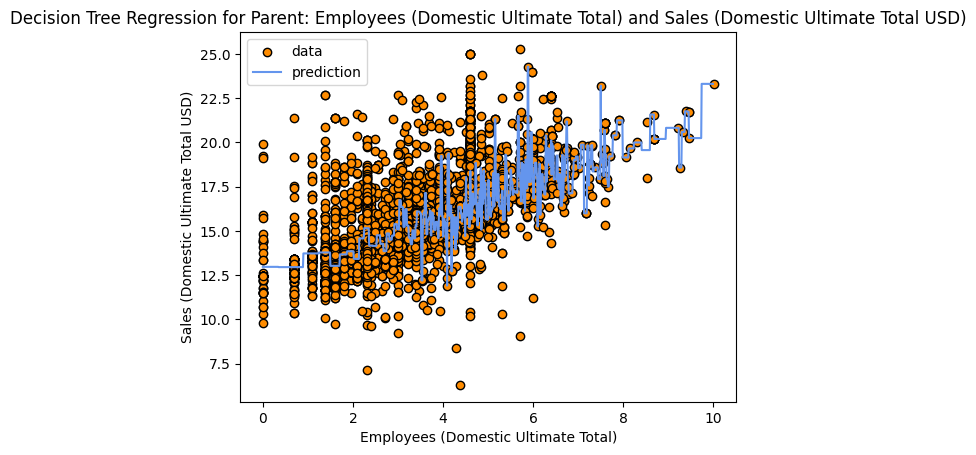

Errors for Parent: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 1.6408888481195554
Mean Absolute Error: 0.7362931308418492


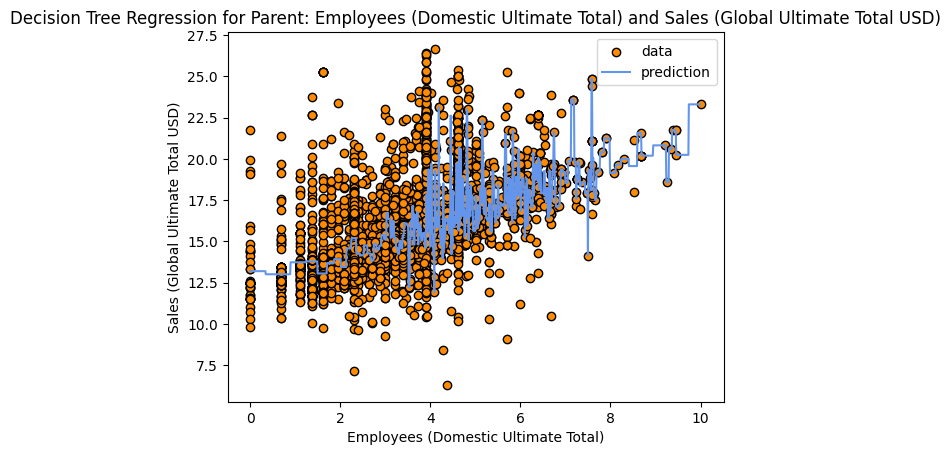

Errors for Parent: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 2.39920504310509
Mean Absolute Error: 0.8684209289986162


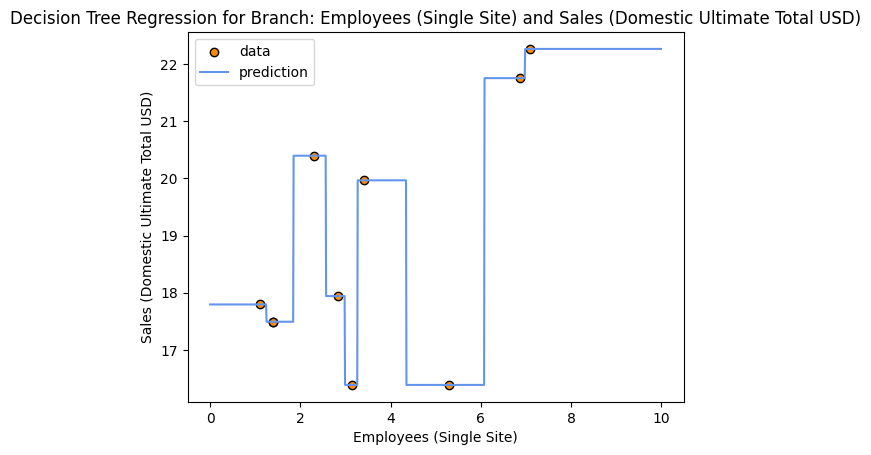

Errors for Branch: Employees (Single Site) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 9.429848984010224
Mean Absolute Error: 3.0189581196467223


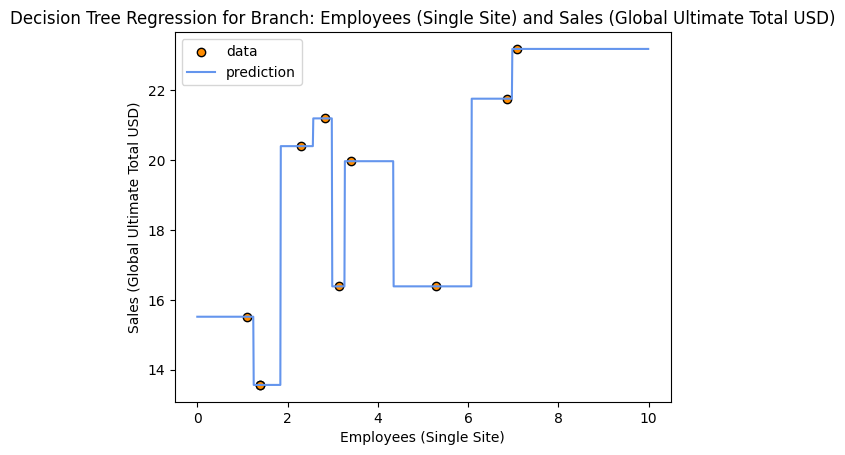

Errors for Branch: Employees (Single Site) and Sales (Global Ultimate Total USD)
Mean Squared Error: 6.726725183574719
Mean Absolute Error: 2.187562425997358


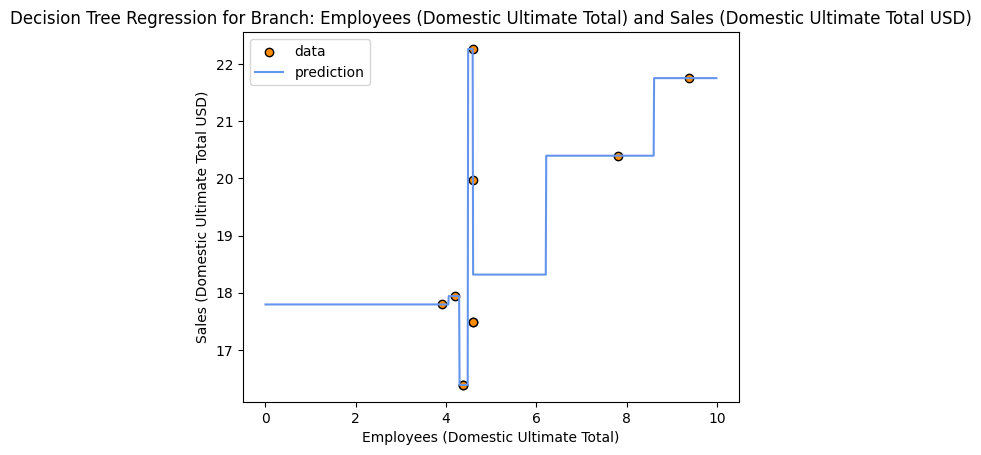

Errors for Branch: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 0.9216377922819872
Mean Absolute Error: 0.6788364281187285


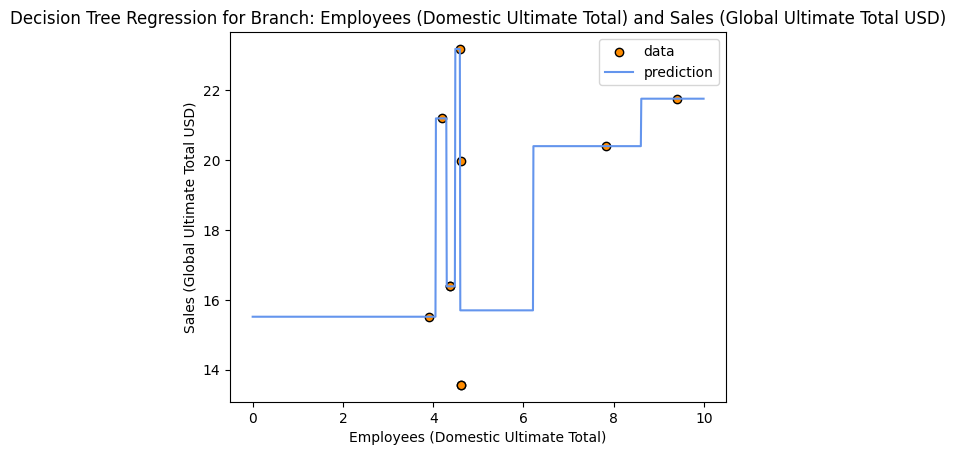

Errors for Branch: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 0.9216377922819872
Mean Absolute Error: 0.6788364281187285


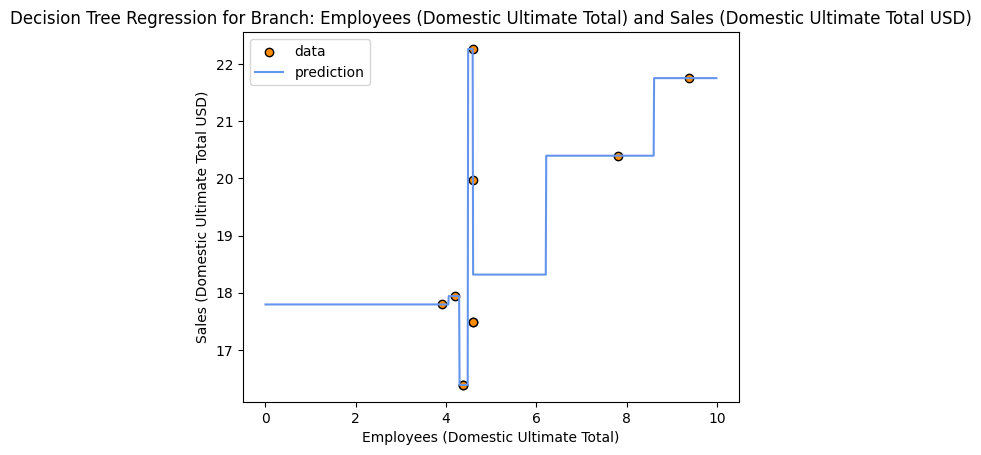

Errors for Branch: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 0.9216377922819872
Mean Absolute Error: 0.6788364281187285


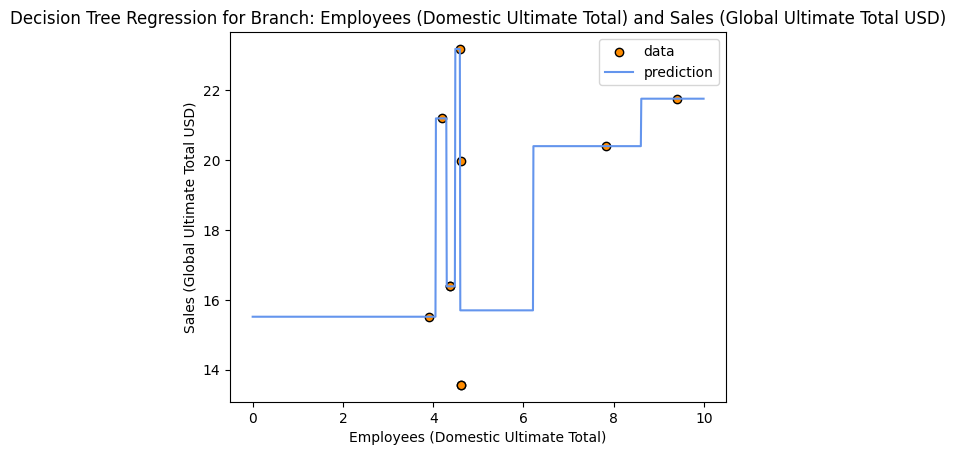

Errors for Branch: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 0.9216377922819872
Mean Absolute Error: 0.6788364281187285


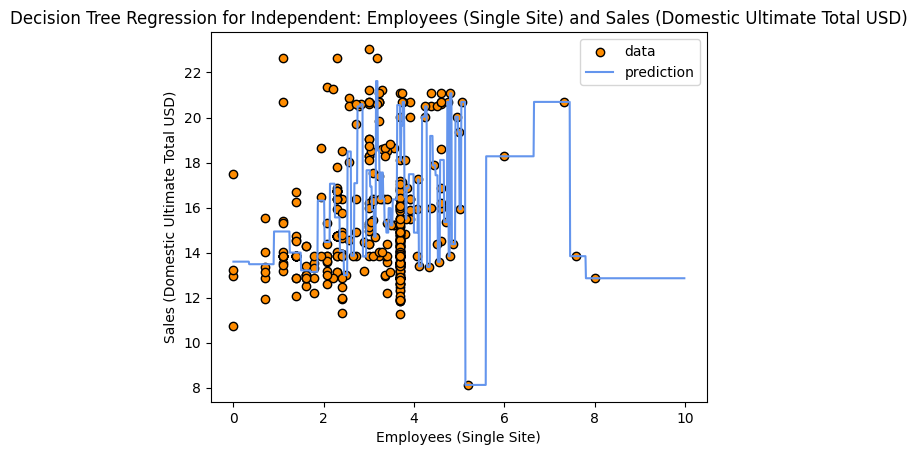

Errors for Independent: Employees (Single Site) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 4.714107395881959
Mean Absolute Error: 1.124486346361291


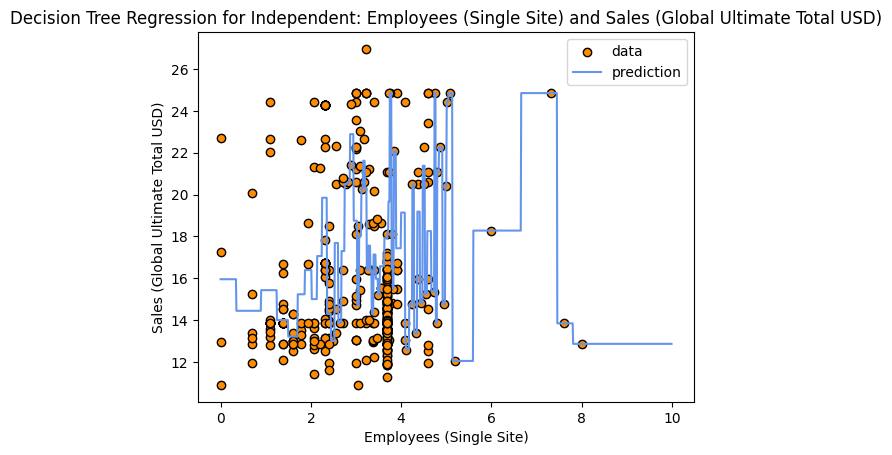

Errors for Independent: Employees (Single Site) and Sales (Global Ultimate Total USD)
Mean Squared Error: 9.088473480262152
Mean Absolute Error: 1.7701315070543784


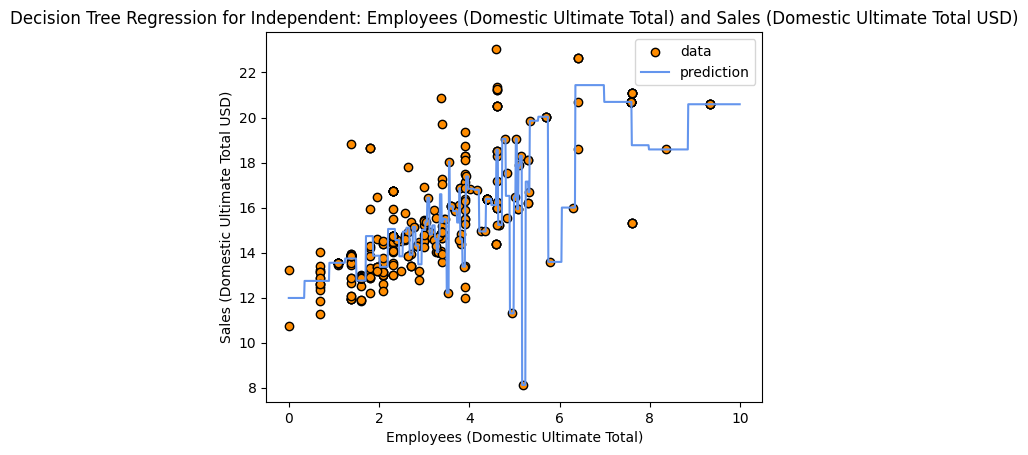

Errors for Independent: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 3.6800822248563576
Mean Absolute Error: 1.0676241870721397


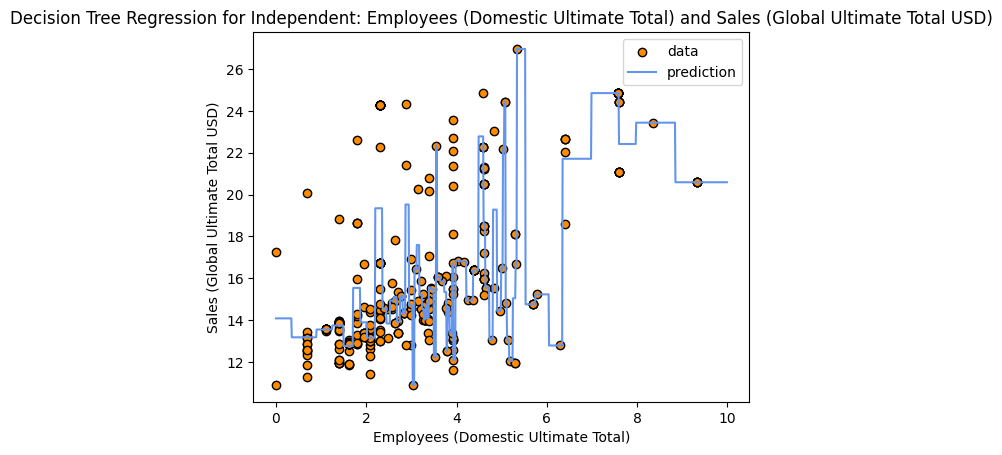

Errors for Independent: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 5.658161698657922
Mean Absolute Error: 1.3770149199482995


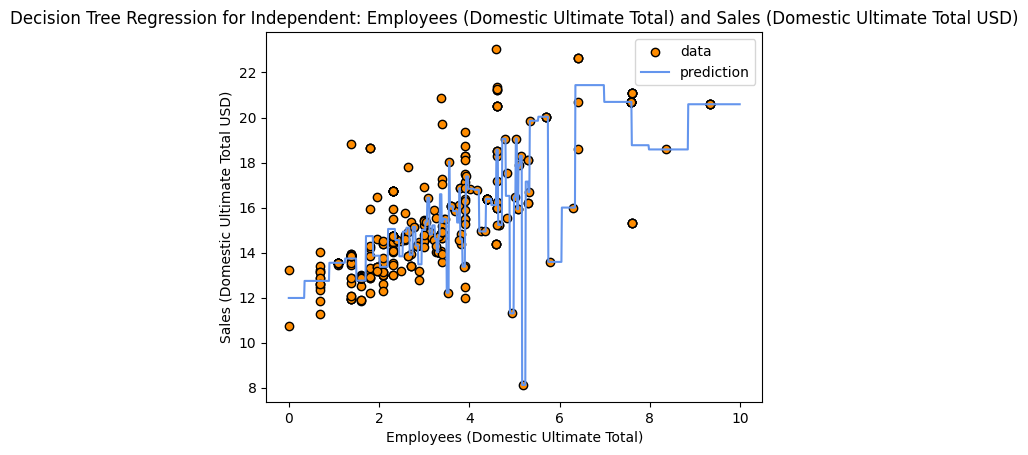

Errors for Independent: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 3.6800822248563576
Mean Absolute Error: 1.0676241870721397


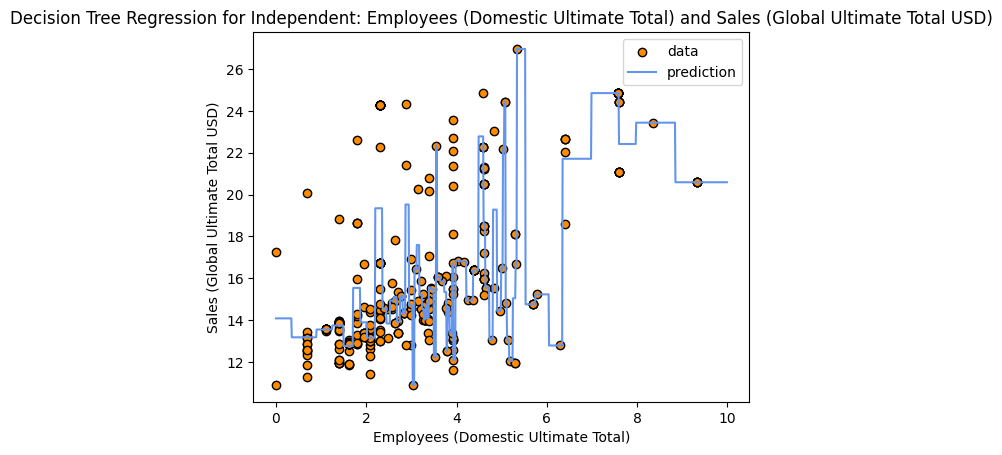

Errors for Independent: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 5.658161698657922
Mean Absolute Error: 1.3770149199482995


In [25]:
#LOOPING THROUGH EVERY PERMUTATION OF (1)GROUP (PARENT, SUBSIDIARY, ETC.), (2)EMPLOYEES, (3)SALES
#loop through all the groups first
for entity in entity_type:
    group = data[data['Entity Type'] == entity]
    
    #Loop through all the employees type for this group
    for employee_type in ['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Domestic Ultimate Total)']:
        for sale_type in ['Sales (Domestic Ultimate Total USD)','Sales (Global Ultimate Total USD)']:
            # Generate some example data
            X = np.array(np.log(group[employee_type])).reshape(-1,1)
            y = np.log(group[sale_type])

            # Create a decision tree regressor
            regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter
            
            # Fit the model to the data
            regressor.fit(X, y)
            
            # Make predictions
            X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
            y_pred = regressor.predict(X_test)
            
            # Plot the results
            plt.figure()
            plt.scatter(X, y, edgecolor="black", c="darkorange", label="data")
            plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
            plt.xlabel(employee_type)
            plt.ylabel(sale_type)
            plt.title(f"Decision Tree Regression for {entity}: {employee_type} and {sale_type}")
            plt.legend()
            plt.show()

            # Sample data for demonstration
            X = np.array(np.log(group[employee_type])).reshape(-1,1)
            y = np.log(group[sale_type])
            
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Create a DecisionTreeRegressor
            regressor = DecisionTreeRegressor(max_depth = 50)
            
            # Fit the regressor to the training data
            regressor.fit(X_train, y_train)
            
            # Make predictions on the test set
            y_pred = regressor.predict(X_test)
            
            # Calculate the Mean Squared Error (MSE)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            print(f"Errors for {entity}: {employee_type} and {sale_type}")
            print("Mean Squared Error:", mse)
            print("Mean Absolute Error:", mae)

In [31]:
mean_errors = {'Subsidiary':[],'Parent':[], 'Branch':[], 'Independent':[]}

for entity in entity_type:
    for max_depth in range(1,11):
        group = data[data['Entity Type'] == entity]
        
        # Generate some example data
        X = np.array(np.log(group['Employees (Domestic Ultimate Total)'])).reshape(-1,1)
        y = np.log(group['Sales (Domestic Ultimate Total USD)'])
        
        # Create a decision tree regressor
        regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter
        
        # Fit the model to the data
        regressor.fit(X, y)
        
        # Make predictions
        X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
        y_pred = regressor.predict(X_test)

        # Sample data for demonstration
        X = np.array(np.log(group['Employees (Domestic Ultimate Total)'])).reshape(-1,1)
        y = np.log(group['Sales (Domestic Ultimate Total USD)'])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Create a DecisionTreeRegressor
        regressor = DecisionTreeRegressor(max_depth = max_depth)
        
        # Fit the regressor to the training data
        regressor.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = regressor.predict(X_test)
        
        # Calculate the Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mean_errors[entity].append((mse+mae)/2)

print(mean_errors)

# print(f"MAX DEPTH: {max_depth}")
# print(f"Errors for {entity}: 'Employees (Domestic Ultimate Total)' and 'Sales (Domestic Ultimate Total USD)'")
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)

{'Subsidiary': [3.0919454202619168, 2.545833419595172, 2.499973411730437, 2.405581908087358, 2.3570998404593198, 2.3172382092618653, 2.294438772425676, 2.2717291191091746, 2.263247355632707, 2.249352190908495], 'Parent': [1.6730791230367046, 1.3401906164075228, 1.2656344901580192, 1.2053720256570482, 1.1818592827503178, 1.1735613464415366, 1.1639487543541724, 1.1701782430531218, 1.1792142540741344, 1.1780277263733219], 'Branch': [0.7323550780320056, 0.6779675844739941, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578], 'Independent': [2.787689144479213, 2.31968872483651, 2.230789747571171, 2.4934049401918825, 2.2096794798651365, 2.2693170932906397, 2.296638741434548, 2.3833372682500946, 2.369917457949168, 2.3738532059642488]}


In [28]:
for key,list in mean_errors.items():
    min_index = list.index(min(list))
    print(f"Best max depth for {key}: {(min_index + 1)*10}")

Best max depth for Subsidiary: 20
Best max depth for Parent: 10
Best max depth for Branch: 10
Best max depth for Independent: 10
